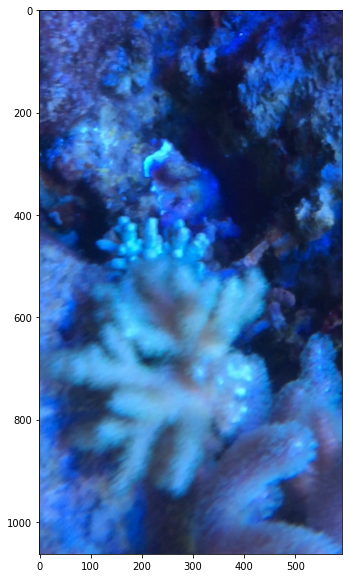

In [7]:
# 简单查看数据集的图片
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/home/featurize/data/image/Sinularia/Sinularia_102.JPG')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [5]:
# 查看单张图的标注信息
!cat /home/featurize/data/annotations/Sarcophyton_69.json

[{"image": "Sarcophyton_69.JPG", "annotations": [{"label": "Sarcophyton", "coordinates": {"x": 1877.4516129032259, "y": 1393.467741935484, "width": 590.0, "height": 419.0}}, {"label": "WavingHand", "coordinates": {"x": 3099.951612903226, "y": 2501.483870967742, "width": 1191.0, "height": 997.0322580645161}}, {"label": "Platygyra", "coordinates": {"x": 3813.7258064516127, "y": 1891.967741935484, "width": 372.5483870967746, "height": 674.0}}, {"label": "Sinularia", "coordinates": {"x": 2291.951612903226, "y": 857.9677419354839, "width": 683.0, "height": 258.0}}, {"label": "WavingHand", "coordinates": {"x": 2116.451612903226, "y": 1738.967741935484, "width": 622.0, "height": 290.0}}, {"label": "Sinularia", "coordinates": {"x": 1048.4516129032259, "y": 862.9677419354839, "width": 280.0, "height": 262.0}}, {"label": "Euphflfiaancora", "coordinates": {"x": 977.4516129032259, "y": 1988.967741935484, "width": 416.0, "height": 416.0}}]}]

# 划分数据集和训练集

In [14]:
import os
import numpy as np
import pandas as pd
import cv2
import os.path
from tqdm import tqdm
import matplotlib.pyplot as plt
import shutil
import random


In [15]:
# 指定数据集路径
dataset_path = 'your_datasetpath'
os.chdir(dataset_path)

In [16]:
classes = os.listdir(os.path.join(dataset_path, 'image'))
#物体目录长度
len(classes)

6

In [17]:
classes

['WavingHand',
 'Favosites',
 'Platygyra',
 'Euphflfiaancora',
 'Sarcophyton',
 'Sinularia']

In [18]:
# 创建 train 文件夹
os.mkdir(os.path.join(dataset_path, 'train'))

# 创建 test 文件夹
os.mkdir(os.path.join(dataset_path, 'val'))

train_path = os.path.join(dataset_path, 'train')
val_path = os.path.join(dataset_path, 'val')

In [20]:
import random

test_frac = 0.2  # 测试集比例
random.seed(234) # 随机数种子

In [21]:
for coral in classes: # 遍历每个文件夹

    # 读取该类别的所有图像文件名 
    # 读取该类别的所有标注文件名
    old_images_dir = os.path.join(dataset_path, 'image/'+coral)
    images_filename = os.listdir(old_images_dir)
    random.shuffle(images_filename) # 随机打乱
    
    # 划分训练集和测试集
    testset_numer = int(len(images_filename) * test_frac) # 测试集图像个数
    testset_images = images_filename[:testset_numer]      # 获取拟移动至 test 目录的测试集图像文件名
    trainset_images = images_filename[testset_numer:]     # 获取拟移动至 train 目录的训练集图像文件名

    # 移动图像至 test 目录
    for image in testset_images:
        old_img_path = os.path.join(dataset_path, 'image', coral, image)         # 获取原始文件路径
        new_test_path = os.path.join(dataset_path, 'val', image) # 获取 test 目录的新文件路径
        shutil.move(old_img_path, new_test_path) # 移动文件

    # 移动图像至 train 目录
    for image in trainset_images:
        old_img_path = os.path.join(dataset_path, 'image', coral, image)           # 获取原始文件路径
        new_train_path = os.path.join(dataset_path, 'train', image) # 获取 train 目录的新文件路径
        shutil.move(old_img_path, new_train_path) # 移动文件
    
    # 删除旧文件夹
    assert len(os.listdir(old_images_dir)) == 0 # 确保旧文件夹中的所有图像都被移动走
    


    WavingHand             83                 20        
    Favosites              86                 21        
    Platygyra              83                 20        
 Euphflfiaancora           90                 22        
   Sarcophyton             89                 22        
    Sinularia              88                 22        


## 生成instances_train.json和instance_test.json

### 写instance_train.json

In [29]:
import cv2
import os
import json
from tqdm import tqdm

#写instance_train.json
# data_dir = '/home/featurize/data/train'
!rm -rf /home/featurize/data/annotations/.ipynb_checkpoints
!rm -rf /home/featurize/data/annotations/instance_train.json
!rm -rf /home/featurize/data/annotations/instance_val.json
#创建用来写json的字典
root = {}
root.fromkeys(('info','license','images','annotations','categories'))
root['images'] = []
root['annotations'] = []
root['categories'] = []

#coco 制造自己的数据集.json
y = 0  #image序号
z = 0  #annotation序号
####################################################训练集############################################################
data_dir = '/home/featurize/data/annotations'  ##注意调成自己的格式
data_img = '/home/featurize/data/train'

# plt.rc('font',family='Times New Roman')
#6种类别
dic_temp_3 = {}
# 6种类别
root['categories'] = [
    {
        'supercategory': 'coral',
        'id': 0,
        'name': 'Euphflfiaancora'
    },
    {
        'supercategory': 'coral',
        'id': 1,
        'name': 'Favosites'
    },
    {
        'supercategory': 'coral',
        'id': 2,
        'name': 'Platygyra'
    },
    {
        'supercategory': 'coral',
        'id': 3,
        'name': 'Sarcophyton'
    },
    {
        'supercategory': 'coral',
        'id': 4,
        'name': 'Sinularia'
    },
    {
        'supercategory': 'coral',
        'id': 5,
        'name': 'WavingHand'
    }
]

for file in tqdm(os.listdir(data_img)):
    with open(data_dir+'/'+file.split('.')[0] +'.json') as f:
        if file.split('.')!=None:
          coco_json = json.load(f)
    dic_temp_1 = {}
    dic_temp_2 = {}
    
    img = cv2.imread(data_img+'/'+file)
    # print(data_img+'/'+file)
    for item in coco_json: #coco_json 一张照片的json
        i=0  #一张图片的annotation
        root['images'].insert(y,(dic_temp_1.fromkeys(('file_name', 'height', 'width', 'id'))))
        root['images'][y]['file_name'] = file  #图片名字
        root['images'][y]['width']=img.shape[1]  #图像宽
        root['images'][y]['height']=img.shape[0]  #图像高
        root['images'][y]['id']=y
        #root['categories'].insert(y,(dic_temp_3.fromkeys(('supercategory', 'id', 'name'))))
        
        while i<len(item['annotations']):
            root['annotations'].insert(z,(dic_temp_2.fromkeys(('image_id', 'id', 'iscrowd', 'area', 'category_id', 'bbox'))))
            root['annotations'][z]['image_id']=y  #y是主循环 每张照片的id
            root['annotations'][z]['id']= z #框的id
            root['annotations'][z]['iscrowd']=0 #默认不拥挤
            
            if item['annotations'][i]['label'] == 'Euphflfiaancora':
                root['annotations'][z]['category_id']=0
                coral_detection[0]+=1
            elif item['annotations'][i]['label'] == 'Favosites':
                root['annotations'][z]['category_id']=1
                coral_detection[1]+=1
            elif item['annotations'][i]['label'] == 'Platygyra':
                root['annotations'][z]['category_id']=2
                coral_detection[2]+=1
            elif item['annotations'][i]['label'] == 'Sarcophyton':
                root['annotations'][z]['category_id']=3
                coral_detection[3]+=1
            elif item['annotations'][i]['label'] == 'Sinularia':
                root['annotations'][z]['category_id']=4
                coral_detection[4]+=1
            elif item['annotations'][i]['label'] == 'WavingHand':
                root['annotations'][z]['category_id']=5
                coral_detection[5]+=1
            #目标检测框 x y width height
            bbox = [item['annotations'][i]['coordinates']['x'],
                    item['annotations'][i]['coordinates']['y'],
                    item['annotations'][i]['coordinates']['width'],
                    item['annotations'][i]['coordinates']['height']]
            root['annotations'][z]['bbox'] = [0,1,2,3]
            root['annotations'][z]['bbox'][0]= bbox[0]-bbox[2]/2
            root['annotations'][z]['bbox'][1]= bbox[1]-bbox[3]/2
            root['annotations'][z]['bbox'][2]= bbox[2]
            root['annotations'][z]['bbox'][3]= bbox[3]
            root['annotations'][z]['area'] = bbox[2]*bbox[3]
            # df = df.append({'类别': item['annotations'][i]['label'], '文件名':str(i), '图像宽':bbox[2], '图像高':bbox[3]}, ignore_index=True)
            z+=1
            i+=1
        y+=1
        

root

with open('/home/featurize/data/annotations/instances_train.json', 'w') as file:
    result = json.dump(root, file)



100%|██████████| 1077/1077 [01:33<00:00, 11.58it/s]


In [30]:
####################################################测试集############################################################
    
#创建用来写json的字典
root = {}
root.fromkeys(('info','license','images','annotations','categories'))
root['images'] = []
root['annotations'] = []
root['categories'] = []

#coco 制造自己的数据集.json
y = 0  #image序号
z = 0  #annotation序号

data_img = '/home/featurize/data/val'

#一种类别
dic_temp_3 = {}
# 6种类别
root['categories'] = [
    {
        'supercategory': 'coral',
        'id': 0,
        'name': 'Euphflfiaancora'
    },
    {
        'supercategory': 'coral',
        'id': 1,
        'name': 'Favosites'
    },
    {
        'supercategory': 'coral',
        'id': 2,
        'name': 'Platygyra'
    },
    {
        'supercategory': 'coral',
        'id': 3,
        'name': 'Sarcophyton'
    },
    {
        'supercategory': 'coral',
        'id': 4,
        'name': 'Sinularia'
    },
    {
        'supercategory': 'coral',
        'id': 5,
        'name': 'WavingHand'
    }
]

for file in tqdm(os.listdir(data_img)):
    with open(data_dir+'/'+file.split('.')[0] +'.json') as f:
        coco_json = json.load(f)
    dic_temp_1 = {}
    dic_temp_2 = {}
    dic_temp_3 = {}
    img = cv2.imread(data_img+'/'+file)
    # print(data_img+'/'+file)
    for item in coco_json: #coco_json 一张照片的json
        i=0  #一张图片的annotation
        root['images'].insert(y,(dic_temp_1.fromkeys(('file_name', 'height', 'width', 'id'))))
        root['images'][y]['file_name'] = file  #图片名字
        root['images'][y]['width']=img.shape[1]  #图像宽
        root['images'][y]['height']=img.shape[0]  #图像高
        root['images'][y]['id']=y
        while i<len(item['annotations']):
            root['annotations'].insert(z,(dic_temp_2.fromkeys(('image_id', 'id', 'iscrowd', 'area', 'category_id', 'bbox'))))
            root['annotations'][z]['image_id']=y  #y是主循环 每张照片的id
            root['annotations'][z]['id']= z #框的id
            root['annotations'][z]['iscrowd']=0 #默认不拥挤
            #root['annotations'][z]['area'] = item['annotations'][i]['coordinates']['width']*item['annotations'][i]['coordinates']['height']
            if item['annotations'][i]['label'] == 'Euphflfiaancora':
                root['annotations'][z]['category_id']=0 
                coral_detection[0]+=1
            elif item['annotations'][i]['label'] == 'Favosites':
                root['annotations'][z]['category_id']=1
                coral_detection[1]+=1
            elif item['annotations'][i]['label'] == 'Platygyra':
                root['annotations'][z]['category_id']=2
                coral_detection[2]+=1
            elif item['annotations'][i]['label'] == 'Sarcophyton':
                root['annotations'][z]['category_id']=3 
                coral_detection[3]+=1
            elif item['annotations'][i]['label'] == 'Sinularia':
                root['annotations'][z]['category_id']=4
                coral_detection[4]+=1
            elif item['annotations'][i]['label'] == 'WavingHand':
                root['annotations'][z]['category_id']=5
                coral_detection[5]+=1
            #目标检测框 x y width height
            bbox = [item['annotations'][i]['coordinates']['x'],
                    item['annotations'][i]['coordinates']['y'],
                    item['annotations'][i]['coordinates']['width'],
                    item['annotations'][i]['coordinates']['height']]
            root['annotations'][z]['bbox'] = [0,1,2,3]
            root['annotations'][z]['bbox'][0]= bbox[0]-bbox[2]/2
            root['annotations'][z]['bbox'][1]= bbox[1]-bbox[3]/2
            root['annotations'][z]['bbox'][2]= bbox[2]
            root['annotations'][z]['bbox'][3]= bbox[3]
            root['annotations'][z]['area'] = bbox[2]*bbox[3]
            # df = df.append({'类别': item['annotations'][i]['label'], '文件名':str(i), '图像宽':bbox[2], '图像高':bbox[3]}, ignore_index=True)
            z+=1
            i+=1
        y+=1

root

with open('/home/featurize/data/annotations/instances_val.json', 'w') as file:
    result = json.dump(root, file)    


100%|██████████| 127/127 [00:22<00:00,  5.76it/s]


In [31]:
%cd /home/featurize/data/annotations #清理文件夹
!rm -rf Euphflfiaancora* WavingHand* Favosites* Sarcophyton* Sinularia* Platygyra*

/home/featurize/data/annotations


In [32]:
folder_path = '/home/featurize/data/train'

In [33]:
# 可视化图像的个数
N = 25

In [34]:
# n 行 n 列
n = math.floor(np.sqrt(N))
n

5